# Coursework Code

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

In [8]:
n = 200

rn = np.random.uniform(-2, 2, n)
x_clean = np.reshape(np.sort(rn, axis=0), (n, 1))

def f(x):
    return math.sin(math.pi*x)

In [9]:
x = x_clean
f2 = np.vectorize(f)
y_clean = f2(x)
y = y_clean #+ noise(0,0.1)

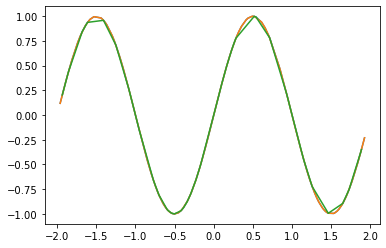

In [10]:
x_train_2, x_test_2, y_train, y_test = train_test_split(x,y,test_size=0.25)


x_train = np.reshape(np.sort(x_train_2, axis=0), (len(x_train_2), 1))
x_test = np.reshape(np.sort(x_test_2, axis=0), (len(x_test_2), 1))

y_train = f2(x_train)
y_test = f2(x_test)


plt.plot(x,y)
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)

In [11]:
def make_design(x, basisfn, basisfn_locs=None): 
    if basisfn_locs is None:
        return np.concatenate([np.ones(x.shape), basisfn(x)], axis=1)
    else:
        return np.concatenate([np.ones(x.shape)] + [basisfn(x, loc) for loc in basisfn_locs], axis=1)

def polynomial_basis_fn(x, degree):
    return x ** degree

def calculate_w_poly(x, y, lam, p):
    locs = []
    for i in range(1,p+1):
        locs.append(i)
    
    design = make_design(x, polynomial_basis_fn, locs)

    w = (np.linalg.inv(design.T @ design + lam * np.identity(p+1)) @ (design.T @ y))
    return w

def polynomial_regression(x_test, x_train, y_test, lam, p):
    w = calculate_w_poly(x_test,y_test,lam,p)

    t = []
    for xVal in x_train:
        targ = 0
        targ = targ + w[0]
        for i in range(1,len(w)):
            targ = targ + w[i]*polynomial_basis_fn(xVal,i)
        t.append(targ)
    return t

In [12]:
t = polynomial_regression(x_test, x_train, y_test,0,8)



plt.plot(x_train, y_train, label="Actual")
plt.plot(x_train, t, label="Polynomial Regression")
plt.legend()

NameError: name 'make_design' is not defined

In [ ]:
t_array = []

for i in range(0,15):
    t_array.append(polynomial_regression(x_test, x_train, y_test, 0, i))

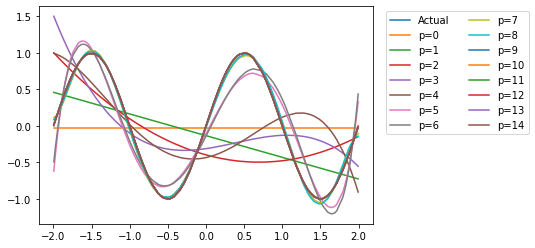

In [ ]:
plt.plot(x_train, y_train, label="Actual")
for i in range(0,15):
    plt.plot(x_train, t_array[i], label="p="+str(i))
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1), ncol=2)

In [ ]:
def error(y,t):
    error = 0
    for i in range(0,len(t)):
        error = error + (t[i]-y[i])**2
    return error

def erms(y,t,N):
    return math.sqrt((2*error(y,t))/N)

In [ ]:
error = []
error_labels = []
for i in range(0,15):
    error.append(y_train-t_array[i])
    error_labels.append(0)

[[ 0.03836622]
 [ 0.06978984]
 [ 0.11428279]
 [ 0.22023844]
 [ 0.2677261 ]
 [ 0.34538328]
 [ 0.40484463]
 [ 0.48767483]
 [ 0.59494117]
 [ 0.62169533]
 [ 0.65150765]
 [ 0.68109621]
 [ 0.68749305]
 [ 0.69560998]
 [ 0.71627374]
 [ 0.75387106]
 [ 0.87796068]
 [ 0.9349268 ]
 [ 0.97456001]
 [ 0.99270204]
 [ 0.9957024 ]
 [ 0.99725456]
 [ 1.01616893]
 [ 1.01417529]
 [ 0.96956472]
 [ 0.88527195]
 [ 0.87713834]
 [ 0.84963276]
 [ 0.84836882]
 [ 0.8410651 ]
 [ 0.83209202]
 [ 0.81192811]
 [ 0.75869744]
 [ 0.73583144]
 [ 0.59377676]
 [ 0.40597672]
 [ 0.4057909 ]
 [ 0.07892539]
 [ 0.05449611]
 [ 0.04487437]
 [-0.01982035]
 [-0.12667267]
 [-0.24849125]
 [-0.24936547]
 [-0.27555476]
 [-0.38613367]
 [-0.43593919]
 [-0.55574771]
 [-0.64322362]
 [-0.69236397]
 [-0.71874402]
 [-0.75398279]
 [-0.78035135]
 [-0.78830712]
 [-0.89068257]
 [-0.89918546]
 [-0.93798772]
 [-0.96075899]
 [-0.96599389]
 [-0.97520486]
 [-0.97102199]
 [-0.94530183]
 [-0.85958947]
 [-0.76092592]
 [-0.606761  ]
 [-0.59962839]
 [-0.30021

ValueError: X must have 2 or fewer dimensions

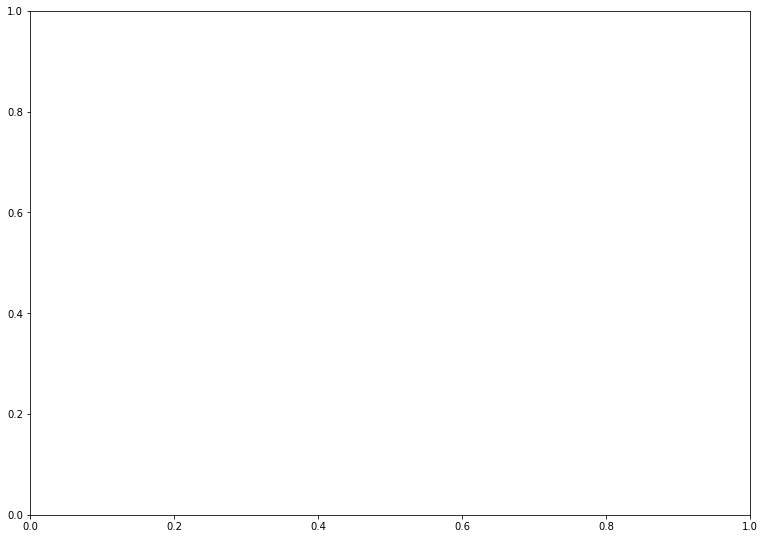

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]

fig = plt.figure(figsize =(10, 7))
error_list = []
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
for i in range(0,15):
    #print(error[i])
    error_list.append(flatten(error[i].tolist()))

#print(error_list)
ax.boxplot(list(error))
